In [12]:
import cv2
import pandas as pd
import numpy as np
from tqdm import tqdm
import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config)
from keras.backend.tensorflow_backend import set_session
set_session(tf.Session(config=config))
#import keras
from keras import backend as K
K.set_image_dim_ordering('tf')
from keras.models import Model
import numpy as np
from keras.applications.imagenet_utils import preprocess_input
from keras.preprocessing import image
from matplotlib.pyplot import imshow
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,Activation, Conv2D, MaxPooling2D,BatchNormalization,GlobalAveragePooling2D
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical

import keras
import numpy as np
from keras.preprocessing.image import ImageDataGenerator


In [13]:
train=pd.read_csv("/home/sainathb/dog breed files/Image_Classification/labels.csv")

In [14]:
ylabels=train['breed']
ylabels=np.array(pd.get_dummies(ylabels))
ylabels.shape

(10222, 120)

In [15]:
from sklearn.feature_extraction import image
def read_img(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img,(300,300))
    return img/255

In [16]:
def crop_read_img(img_path):
    img = cv2.imread(img_path)
    s=img.shape
    if(s[0]<=300):
        t=300-s[0]
    else:
        t=0
    if(s[1]<=300):
        p=300-s[1]
    else:
        p=0
    img =cv2.copyMakeBorder( img,int(t/2),int(t/2),int(p/2),int(p/2),cv2.BORDER_CONSTANT,value=[155,155,155])
    img=cv2.resize(img,(300,300))
    return img/255

In [17]:
trainimages=[]
for img_path in tqdm(train['id'].values):
        trainimages.append(read_img("/home/sainathb/dog breed files/Image_Classification/train/"+ img_path+".jpg"))

100%|██████████| 10222/10222 [01:12<00:00, 141.88it/s]


In [18]:
trainimages=np.array(trainimages)

In [19]:
trainimages.shape

(10222, 300, 300, 3)

In [20]:
croptrainimages=[]
for img_path in tqdm(train['id'].values):
        croptrainimages.append(crop_read_img("/home/sainathb/dog breed files/Image_Classification/traincopy/train/"+ img_path+".jpg"))

100%|██████████| 10222/10222 [01:00<00:00, 168.31it/s]


In [21]:
croptrainimages=np.array(croptrainimages)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(trainimages,ylabels, test_size=0.1, random_state=42,shuffle=True)

In [23]:
from sklearn.model_selection import train_test_split
cX_train,cX_test, cy_train, cy_test = train_test_split(croptrainimages,ylabels, test_size=0.1, random_state=42,shuffle=True)

In [24]:
from keras.applications.inception_resnet_v2 import InceptionResNetV2


base_model1= keras.applications.xception.Xception(include_top=False, weights='imagenet',input_shape=(300,300,3),pooling='avg')

base_model2= keras.applications.inception_v3.InceptionV3(include_top=False, weights='imagenet',input_shape=(300,300,3),pooling='avg')

base_model3 =InceptionResNetV2(include_top=False , weights='imagenet',input_shape=(300,300,3),pooling='avg')


In [25]:
xpreds=base_model1.predict(x=X_train,batch_size=10)
print(xpreds.shape)
ipreds=base_model2.predict(x=X_train,batch_size=100)
print(ipreds.shape)
irpreds=base_model3.predict(x=X_train,batch_size=100)
print(irpreds.shape)

(9199, 2048)
(9199, 2048)
(9199, 1536)


In [26]:
xfpreds=base_model1.predict(x=np.flip(X_train,axis=2),batch_size=10)
print(xfpreds.shape)
ifpreds=base_model2.predict(x=np.flip(X_train,axis=2),batch_size=10)
print(ifpreds.shape)
irfpreds=base_model3.predict(x=np.flip(X_train,axis=2),batch_size=10)
print(irfpreds.shape)

(9199, 2048)
(9199, 2048)
(9199, 1536)


In [27]:
cxpreds=base_model1.predict(x=cX_train,batch_size=10)
print(cxpreds.shape)
cipreds=base_model2.predict(x=cX_train,batch_size=10)
print(cipreds.shape)
cirpreds=base_model3.predict(x=cX_train,batch_size=10)
print(cirpreds.shape)

(9199, 2048)
(9199, 2048)
(9199, 1536)


In [28]:
cxfpreds=base_model1.predict(x=np.flip(cX_train,axis=2),batch_size=10)
print(cxfpreds.shape)
cifpreds=base_model2.predict(x=np.flip(cX_train,axis=2),batch_size=10)
print(cifpreds.shape)
cirfpreds=base_model3.predict(x=np.flip(cX_train,axis=2),batch_size=10)
print(cirfpreds.shape)

(9199, 2048)
(9199, 2048)
(9199, 1536)


In [29]:
txpreds=base_model1.predict(x=X_test,batch_size=10)
tipreds=base_model2.predict(x=X_test,batch_size=10)
tirpreds=base_model3.predict(x=X_test,batch_size=10)


In [30]:

txfpreds=base_model1.predict(x=np.flip(X_test,axis=2),batch_size=50)
tifpreds=base_model2.predict(x=np.flip(X_test,axis=2),batch_size=50)
tirfpreds=base_model3.predict(x=np.flip(X_test,axis=2),batch_size=50)

In [31]:
ctxpreds=base_model1.predict(x=cX_test,batch_size=10)
ctipreds=base_model2.predict(x=cX_test,batch_size=10)
ctirpreds=base_model3.predict(x=cX_test,batch_size=10)

ctxfpreds=base_model1.predict(x=np.flip(cX_test,axis=2),batch_size=50)
ctifpreds=base_model2.predict(x=np.flip(cX_test,axis=2),batch_size=50)
ctirfpreds=base_model3.predict(x=np.flip(cX_test,axis=2),batch_size=50)

In [32]:
Xtrain=np.concatenate([irpreds,ipreds,xpreds],axis=-1)
Xtrain.shape

Xtest=np.concatenate([tirpreds,tipreds,txpreds],axis=-1)
Xtest.shape


(1023, 5632)

In [33]:
Xftrain=np.concatenate([irfpreds,ifpreds,xfpreds],axis=-1)
Xftrain.shape
cXtrain=np.concatenate([cirpreds,cipreds,cxpreds],axis=-1)
cXtrain.shape
cXftrain=np.concatenate([cirfpreds,cifpreds,cxfpreds,],axis=-1)
cXftrain.shape

Xftest=np.concatenate([tirfpreds,tifpreds,txfpreds],axis=-1)
Xftest.shape
cXtest=np.concatenate([ctirpreds,ctipreds,ctxpreds],axis=-1)
cXtest.shape
cXftest=np.concatenate([ctirfpreds,ctifpreds,ctxfpreds],axis=-1)
cXftest.shape

(1023, 5632)

In [47]:
from numpy.random import seed
seed(1)

In [48]:
def mymodel():
    model = Sequential()
    model.add(Dense(512,input_shape=(5632,)))
    model.add(Activation('elu'))
    model.add(Dense(512))
    model.add(Activation('elu'))
    model.add(Dense(120))
    model.add(Activation('softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
    return model

In [56]:
tensor=keras.callbacks.TensorBoard(log_dir='./logs/model1', histogram_freq=0, batch_size=32, write_graph=True, write_grads=False, write_images=False, embeddings_freq=0, embeddings_layer_names=None, embeddings_metadata=None)
tensor1=keras.callbacks.TensorBoard(log_dir='./logs/model2', histogram_freq=0, batch_size=32, write_graph=True, write_grads=False, write_images=False, embeddings_freq=0, embeddings_layer_names=None, embeddings_metadata=None)
tensor2=keras.callbacks.TensorBoard(log_dir='./logs/model3', histogram_freq=0, batch_size=32, write_graph=True, write_grads=False, write_images=False, embeddings_freq=0, embeddings_layer_names=None, embeddings_metadata=None)
tensor3=keras.callbacks.TensorBoard(log_dir='./logs/model4', histogram_freq=0, batch_size=32, write_graph=True, write_grads=False, write_images=False, embeddings_freq=0, embeddings_layer_names=None, embeddings_metadata=None)



In [62]:
from keras import regularizers
model1=mymodel()
model1.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model1.fit(Xtrain,y_train, epochs=100,batch_size=150, shuffle=True,verbose=1,validation_data=(Xtest,y_test),callbacks=[tensor])

Train on 9199 samples, validate on 1023 samples
Epoch 1/100
9199/9199 [==============================] - 1s 69us/step - loss: 4.3820 - acc: 0.1701 - val_loss: 3.8870 - val_acc: 0.4164
Epoch 2/100
9199/9199 [==============================] - 0s 43us/step - loss: 3.4294 - acc: 0.5522 - val_loss: 2.9690 - val_acc: 0.6364
Epoch 3/100
9199/9199 [==============================] - 0s 42us/step - loss: 2.5411 - acc: 0.6836 - val_loss: 2.1707 - val_acc: 0.6989
Epoch 4/100
9199/9199 [==============================] - 0s 41us/step - loss: 1.8374 - acc: 0.7505 - val_loss: 1.5919 - val_acc: 0.7732
Epoch 5/100
9199/9199 [==============================] - 0s 40us/step - loss: 1.3642 - acc: 0.7904 - val_loss: 1.2333 - val_acc: 0.7928
Epoch 6/100
9199/9199 [==============================] - 0s 40us/step - loss: 1.0750 - acc: 0.8104 - val_loss: 1.0291 - val_acc: 0.7977
Epoch 7/100
9199/9199 [==============================] - 0s 38us/step - loss: 0.8992 - acc: 0.8218 - val_loss: 0.8916 - val_acc: 0.8123


9199/9199 [==============================] - 0s 39us/step - loss: 0.2225 - acc: 0.9421 - val_loss: 0.4947 - val_acc: 0.8514
Epoch 61/100
9199/9199 [==============================] - 0s 42us/step - loss: 0.2189 - acc: 0.9439 - val_loss: 0.5081 - val_acc: 0.8495
Epoch 62/100
9199/9199 [==============================] - 0s 44us/step - loss: 0.2164 - acc: 0.9438 - val_loss: 0.4956 - val_acc: 0.8573
Epoch 63/100
9199/9199 [==============================] - 0s 44us/step - loss: 0.2130 - acc: 0.9451 - val_loss: 0.4965 - val_acc: 0.8651
Epoch 64/100
9199/9199 [==============================] - 0s 46us/step - loss: 0.2103 - acc: 0.9451 - val_loss: 0.4990 - val_acc: 0.8553
Epoch 65/100
9199/9199 [==============================] - 0s 46us/step - loss: 0.2081 - acc: 0.9493 - val_loss: 0.4985 - val_acc: 0.8524
Epoch 66/100
9199/9199 [==============================] - 0s 42us/step - loss: 0.2050 - acc: 0.9486 - val_loss: 0.5006 - val_acc: 0.8573
Epoch 67/100
9199/9199 [==============================

In [61]:
from keras import regularizers
model2=mymodel()
model2.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model2.fit(Xftrain,y_train, epochs=100,batch_size=150, shuffle=True,verbose=1,validation_data=(Xftest,y_test),callbacks=[tensor1])

Train on 9199 samples, validate on 1023 samples
Epoch 1/100
9199/9199 [==============================] - 1s 69us/step - loss: 4.3855 - acc: 0.1711 - val_loss: 3.8946 - val_acc: 0.4242
Epoch 2/100
9199/9199 [==============================] - 0s 43us/step - loss: 3.4290 - acc: 0.5598 - val_loss: 2.9707 - val_acc: 0.6246
Epoch 3/100
9199/9199 [==============================] - 0s 40us/step - loss: 2.5434 - acc: 0.6770 - val_loss: 2.1786 - val_acc: 0.7175
Epoch 4/100
9199/9199 [==============================] - 0s 41us/step - loss: 1.8457 - acc: 0.7416 - val_loss: 1.6114 - val_acc: 0.7556
Epoch 5/100
9199/9199 [==============================] - 0s 43us/step - loss: 1.3747 - acc: 0.7848 - val_loss: 1.2486 - val_acc: 0.7840
Epoch 6/100
9199/9199 [==============================] - 0s 42us/step - loss: 1.0842 - acc: 0.8060 - val_loss: 1.0276 - val_acc: 0.8006
Epoch 7/100
9199/9199 [==============================] - 0s 43us/step - loss: 0.9088 - acc: 0.8214 - val_loss: 0.8986 - val_acc: 0.8065


9199/9199 [==============================] - 0s 39us/step - loss: 0.2244 - acc: 0.9405 - val_loss: 0.4888 - val_acc: 0.8543
Epoch 61/100
9199/9199 [==============================] - 0s 38us/step - loss: 0.2209 - acc: 0.9413 - val_loss: 0.4918 - val_acc: 0.8504
Epoch 62/100
9199/9199 [==============================] - 0s 40us/step - loss: 0.2183 - acc: 0.9416 - val_loss: 0.4935 - val_acc: 0.8524
Epoch 63/100
9199/9199 [==============================] - 0s 40us/step - loss: 0.2152 - acc: 0.9441 - val_loss: 0.4838 - val_acc: 0.8504
Epoch 64/100
9199/9199 [==============================] - 0s 40us/step - loss: 0.2128 - acc: 0.9442 - val_loss: 0.4862 - val_acc: 0.8563
Epoch 65/100
9199/9199 [==============================] - 0s 41us/step - loss: 0.2099 - acc: 0.9463 - val_loss: 0.4854 - val_acc: 0.8504
Epoch 66/100
9199/9199 [==============================] - 0s 39us/step - loss: 0.2077 - acc: 0.9465 - val_loss: 0.4847 - val_acc: 0.8573
Epoch 67/100
9199/9199 [==============================

In [63]:
from keras import regularizers
model3=mymodel()
model3.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model3.fit(cXtrain,y_train, epochs=100,batch_size=150, shuffle=True,verbose=1,validation_data=(cXtest,y_test),callbacks=[tensor2])

Train on 9199 samples, validate on 1023 samples
Epoch 1/100
9199/9199 [==============================] - 1s 75us/step - loss: 4.3942 - acc: 0.1676 - val_loss: 3.8886 - val_acc: 0.4262
Epoch 2/100
9199/9199 [==============================] - 0s 48us/step - loss: 3.4240 - acc: 0.5410 - val_loss: 2.9518 - val_acc: 0.6354
Epoch 3/100
9199/9199 [==============================] - 0s 47us/step - loss: 2.5332 - acc: 0.6758 - val_loss: 2.1567 - val_acc: 0.7028
Epoch 4/100
9199/9199 [==============================] - 0s 47us/step - loss: 1.8351 - acc: 0.7504 - val_loss: 1.5888 - val_acc: 0.7713
Epoch 5/100
9199/9199 [==============================] - 0s 47us/step - loss: 1.3704 - acc: 0.7973 - val_loss: 1.2348 - val_acc: 0.7986
Epoch 6/100
9199/9199 [==============================] - 0s 48us/step - loss: 1.0903 - acc: 0.8179 - val_loss: 1.0179 - val_acc: 0.7986
Epoch 7/100
9199/9199 [==============================] - 0s 47us/step - loss: 0.9210 - acc: 0.8256 - val_loss: 0.8880 - val_acc: 0.8201


9199/9199 [==============================] - 0s 41us/step - loss: 0.2579 - acc: 0.9359 - val_loss: 0.5097 - val_acc: 0.8534
Epoch 61/100
9199/9199 [==============================] - 0s 40us/step - loss: 0.2550 - acc: 0.9378 - val_loss: 0.5085 - val_acc: 0.8514
Epoch 62/100
9199/9199 [==============================] - 0s 39us/step - loss: 0.2519 - acc: 0.9394 - val_loss: 0.4988 - val_acc: 0.8573
Epoch 63/100
9199/9199 [==============================] - 0s 42us/step - loss: 0.2485 - acc: 0.9373 - val_loss: 0.4981 - val_acc: 0.8661
Epoch 64/100
9199/9199 [==============================] - 0s 41us/step - loss: 0.2449 - acc: 0.9404 - val_loss: 0.4974 - val_acc: 0.8612
Epoch 65/100
9199/9199 [==============================] - 0s 40us/step - loss: 0.2425 - acc: 0.9426 - val_loss: 0.5040 - val_acc: 0.8543
Epoch 66/100
9199/9199 [==============================] - 0s 40us/step - loss: 0.2386 - acc: 0.9423 - val_loss: 0.5040 - val_acc: 0.8612
Epoch 67/100
9199/9199 [==============================

In [64]:
from keras import regularizers
model4=mymodel()
model4.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model4.fit(cXftrain,y_train, epochs=100,batch_size=150, shuffle=True,verbose=1,validation_data=(cXftest,y_test),callbacks=[tensor3])

Train on 9199 samples, validate on 1023 samples
Epoch 1/100
9199/9199 [==============================] - 1s 70us/step - loss: 4.3919 - acc: 0.1669 - val_loss: 3.8517 - val_acc: 0.4702
Epoch 2/100
9199/9199 [==============================] - 0s 42us/step - loss: 3.4143 - acc: 0.5708 - val_loss: 2.9104 - val_acc: 0.6549
Epoch 3/100
9199/9199 [==============================] - 0s 41us/step - loss: 2.5057 - acc: 0.6916 - val_loss: 2.1034 - val_acc: 0.7361
Epoch 4/100
9199/9199 [==============================] - 0s 39us/step - loss: 1.7987 - acc: 0.7544 - val_loss: 1.5446 - val_acc: 0.7703
Epoch 5/100
9199/9199 [==============================] - 0s 40us/step - loss: 1.3388 - acc: 0.7938 - val_loss: 1.1960 - val_acc: 0.7937
Epoch 6/100
9199/9199 [==============================] - 0s 44us/step - loss: 1.0644 - acc: 0.8162 - val_loss: 0.9994 - val_acc: 0.8006
Epoch 7/100
9199/9199 [==============================] - 0s 45us/step - loss: 0.9015 - acc: 0.8256 - val_loss: 0.8705 - val_acc: 0.8133


9199/9199 [==============================] - 0s 38us/step - loss: 0.2578 - acc: 0.9386 - val_loss: 0.5044 - val_acc: 0.8436
Epoch 61/100
9199/9199 [==============================] - 0s 40us/step - loss: 0.2542 - acc: 0.9393 - val_loss: 0.4965 - val_acc: 0.8553
Epoch 62/100
9199/9199 [==============================] - 0s 43us/step - loss: 0.2515 - acc: 0.9368 - val_loss: 0.4948 - val_acc: 0.8534
Epoch 63/100
9199/9199 [==============================] - 0s 44us/step - loss: 0.2480 - acc: 0.9404 - val_loss: 0.4964 - val_acc: 0.8465
Epoch 64/100
9199/9199 [==============================] - 0s 44us/step - loss: 0.2444 - acc: 0.9421 - val_loss: 0.4957 - val_acc: 0.8553
Epoch 65/100
9199/9199 [==============================] - 0s 44us/step - loss: 0.2416 - acc: 0.9430 - val_loss: 0.4958 - val_acc: 0.8475
Epoch 66/100
9199/9199 [==============================] - 0s 44us/step - loss: 0.2389 - acc: 0.9430 - val_loss: 0.4969 - val_acc: 0.8485
Epoch 67/100
9199/9199 [==============================

In [66]:
a=model1.predict(Xtest)
b=model2.predict(Xftest)
c=model3.predict(cXtest)
d=model4.predict(cXtest)

In [67]:
e=(a+b+c+d)/4

In [68]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10
plt.style.use('ggplot')

%matplotlib inline

In [69]:
preds=np.argmax(e,1)

In [70]:
y=np.array(y_test)

In [71]:
y=np.argmax(y,1)

In [72]:
breeds=np.unique(train['breed'].values)

In [73]:
pr=[]
for i in preds:
    pr.append(breeds[i])

In [74]:
pr1=[]
for i in y:
    pr1.append(breeds[i])

In [75]:
cm=confusion_matrix(pr1,pr,labels=breeds)

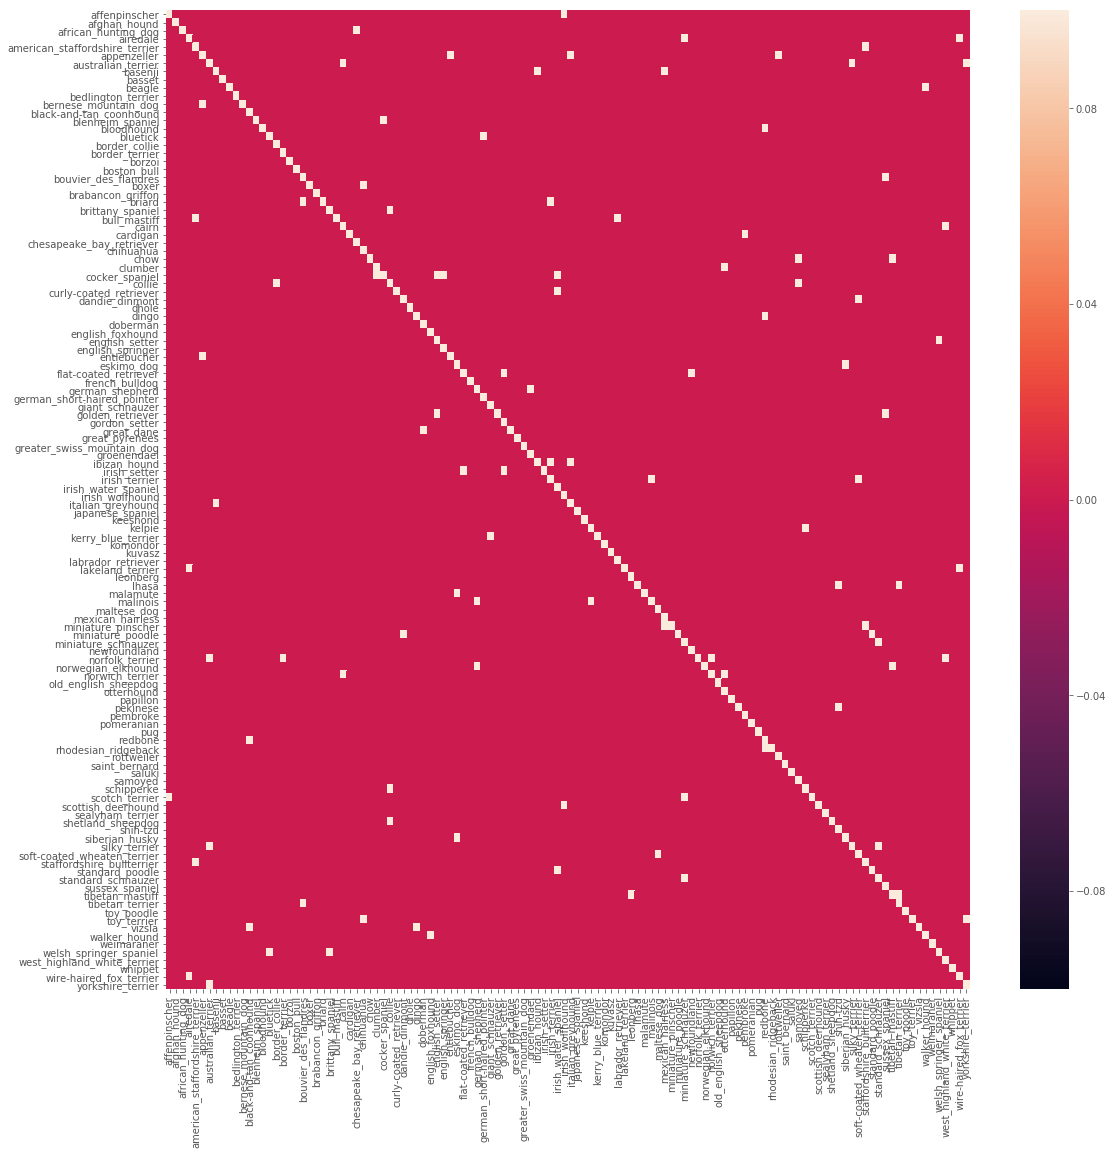

In [76]:
fig, ax = plt.subplots(figsize=(18, 18))
_ = sns.heatmap(cm, ax=ax, yticklabels=breeds, xticklabels=breeds, robust=True)

In [78]:
pr1=np.array(pr1)
pr1.shape
pr1=pr1.reshape(1023,1)

In [79]:
pr=np.array(pr)
pr=pr.reshape(1023,1)

In [80]:
x=np.concatenate((pr1,pr),axis=1)

In [81]:
x.shape

(1023, 2)

In [82]:
np.savetxt("somefile.csv",x,fmt="%s",header="actual,pred,count",delimiter=',',comments='')

In [83]:
df=pd.read_csv("somefile.csv")

In [84]:
df['count'] = 1

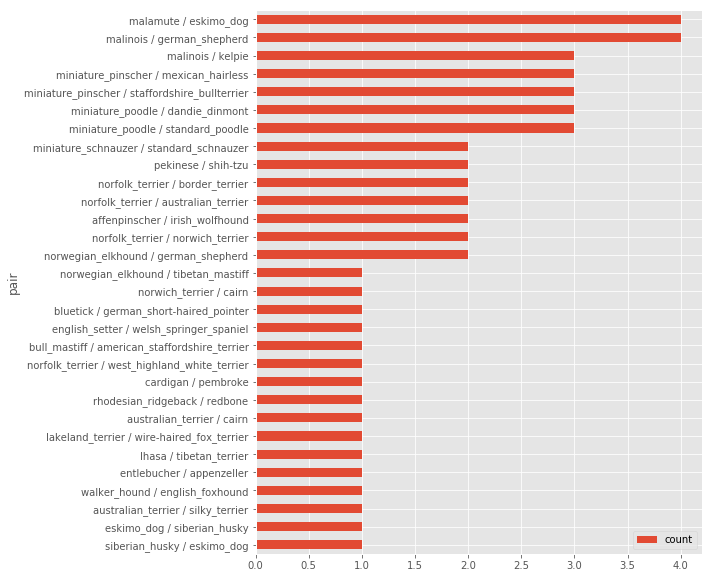

In [85]:

misclass_df = df[df['actual'] != df['pred']].groupby(['actual', 'pred']).sum().sort_values(['count'], ascending=False).reset_index()
misclass_df['pair'] = misclass_df['actual'] + ' / ' + misclass_df['pred']
misclass_df = misclass_df[['pair', 'count']].take(range(30))

misclass_df.sort_values(['count']).plot.barh(figsize=(8, 10), x=misclass_df['pair'])

